## 1. Answer the questions

+ Выведите аналитическое решение задачи регрессии. Используйте векторную форму уравнения.
+ Что изменится в решении при добавлении L1 и L2 регуляризации к функции потерь?
+ Объясните, почему L1 регуляризация часто используется для выбора признаков. Почему после подгонки модели многие веса равны 0?
+ Объясните, как можно использовать те же модели (линейная регрессия, Ridge и т. д.), но при этом обеспечить возможность подгонки нелинейных зависимостей.

##### 1. Векторная форма уравнения без регуляризации

Дана выборка $X \in \mathbb{R}^{n \times m}$ (n объектов, m признаков) и вектор целевой переменной $y \in \mathbb{R}^{n}$.  
Ищем вектор весов $w \in \mathbb{R}^{m}$ и смещение $b \in \mathbb{R}$ (или включаем $b$ в $w$, добавив столбец единиц в X).

**Функция потерь (MSE):**  
$$
L(w) = \frac{1}{n} \| Xw - y \|^2_2
$$

**Градиент:**  
$$
\nabla_w L(w) = \frac{2}{n} X^T (Xw - y)
$$

**Приравниваем градиент к нулю:**  
$$
X^T (Xw - y) = 0 \quad \Rightarrow \quad X^T X w = X^T y
$$

**Нормальное уравнение (аналитическое решение):**  
$$
\hat{w} = (X^T X)^{-1} X^T y
$$

**Примечание:**  
Решение существует, если матрица $X^T X$ обратима (признаки линейно независимы, $n \ge m$).  
Если $X$ включает столбец единиц для учета смещения, то $w$ уже содержит $b$.

---

##### 2. Решение с L2-регуляризацией (Ridge)

**Функция потерь с L2:**  
$$
L(w) = \| Xw - y \|^2_2 + \lambda \|w\|^2_2
$$
где $\lambda \ge 0$ – гиперпараметр регуляризации.

**Градиент и приравнивание к нулю:**  
$$
\nabla_w L(w) = 2X^T (Xw - y) + 2\lambda w = 0
$$
$$
(X^T X + \lambda I) w = X^T y
$$

**Решение Ridge:**  
$$
\hat{w}_{ridge} = (X^T X + \lambda I)^{-1} X^T y
$$

**Что изменилось:**  
- Матрица $X^T X + \lambda I$ всегда обратима при $\lambda > 0$ (даже если $m > n$ или признаки зависимы).
- Веса уменьшаются по норме (сдвигаются к нуля), снижая риск переобучения.

---

##### 3. Решение с L1-регуляризацией (Lasso)

**Функция потерь с L1:**  
$$
L(w) = \| Xw - y \|^2_2 + \lambda \|w\|_1
$$
где $\|w\|_1 = \sum_{j=1}^m |w_j|$.

**Условие оптимальности (через субградиент):**  
Для каждого $j$:
$$
2 \cdot [X^T(Xw - y)]_j + \lambda \cdot \text{sign}(w_j) = 0 \quad \text{если } w_j \neq 0
$$
Если $w_j = 0$, то условие:
$$
\big| [X^T(Xw - y)]_j \big| \le \frac{\lambda}{2}
$$

**Что изменилось:**  
- Решение становится разреженным (многие веса равны нулю).
- Геометрически L1-ограничение (ромб) приводит к попаданию оптимума на оси координат.

---

##### 4. Почему L1 приводит к выбору признаков и нулевым весам

L1-регуляризация добавляет штраф $\lambda |w_j|$.  
Из условия оптимальности следует, что если влияние признака $j$ на предсказание мало (т.е. $|[X^T(Xw - y)]_j|$ мало), то условие для нулевого веса выполняется и $w_j = 0$.

Минимизация MSE с L1-ограничением – поиск точки касания контура MSE с ромбом L1. Углы ромба лежат на осях координат, поэтому часто решение оказывается в углу, где некоторые веса равны нулю.

Модель автоматически отбирает признаки, оставляя только самые важные.

---

##### 5. Обеспечение нелинейности в линейных моделях

**Метод:** использование преобразования признаков (feature engineering) или ядер (kernel trick).

### 5.1 Явное преобразование признаков
Создаём новые признаки как нелинейные функции исходных:
$$
\phi(x) = [1, x, x^2, x^3, \sin(x), \log(x), x_1 x_2, \dots]
$$
Затем применяем линейную регрессию/Ridge/Lasso к $\phi(X)$.

**Пример:** Polynomial Features

## 2. Introduction

+ Импортируйте библиотеки
+ Прочтите train и test части

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from typing import Literal
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [3]:
# train = pd.read_json('data/train.json', encoding='utf-8')
# test = pd.read_json('data/test.json', encoding='utf-8')

In [4]:
source = pd.read_json('data/train.json', encoding='utf-8')
split_indx = int(len(source) * 0.8)
train = source[:split_indx]
test = source[split_indx:]


In [5]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


## 3. Intro data analysis part 2

+ Давайте сгенерируем дополнительные признаки для лучшего качества модели. Рассмотрите столбец 'features'. Он состоит из списка отличительных черт каждой квартиры. 
+ Удалите из столбца неиспользуемые символы ([,], ', ", и пробел).
+ 

In [6]:
chars_to_remove = [' ', '[', ']', "'", '"']
features = source['features'].apply(
    lambda lst: [''.join(c for c in item if c not in chars_to_remove) 
                 for item in lst] if isinstance(lst, list) else lst
)
features.head()

4     [DiningRoom, Pre-War, LaundryinBuilding, Dishw...
6     [Doorman, Elevator, LaundryinBuilding, Dishwas...
9     [Doorman, Elevator, LaundryinBuilding, Laundry...
10                                                   []
15    [Doorman, Elevator, FitnessCenter, LaundryinBu...
Name: features, dtype: object

+ Соберите все значения из каждого списка в один большой датасет. Вы можете использовать DataFrame.iterrows().
+ Как много уникальных значений содержит итоговый список?

In [7]:
features_set = set()
features_list = list()
for _, row in features.items():
    for item in row:
        features_set.add(item)
        features_list.append(item)
len(features_set)

1546

+ Давайте познакомимся с новой библиотекой — Collections. С ней вы можете эффективно получать количественную статистику по своим данным.
+ Посчитайся наиболее популярные значения в нашем большом списке и возьмите топ-20.
+ Если всё верно, вы получите следующие значения: 'Elevator', 'CatsAllowed', 'HardwoodFloors', 'DogsAllowed', 'Doorman', 'Dishwasher', 'NoFee', 'LaundryinBuilding', 'FitnessCenter', 'Pre-War', 'LaundryinUnit', 'RoofDeck', 'OutdoorSpace', 'DiningRoom', 'HighSpeedInternet', 'Balcony', 'SwimmingPool', 'LaundryInBuilding', 'NewConstruction', 'Terrace'.

In [8]:
most_common_features = [item[0] for item in Counter(features_list).most_common(20)]
most_common_features

['Elevator',
 'CatsAllowed',
 'HardwoodFloors',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace']

+ Теперь создайте 20 новых признаков на основе топ-20 значений: 1 если значение есть в столбце 'features', иначе 0.
+ Расширьте наш сет признаками 'bathrooms' и 'bedrooms' и создайте специальную переменную feature_list с названиями всех признаков. Теперь у нас 22 признака. Все модели должны обучаться на этих 22-х признаках.

In [9]:
X_train = train[['bathrooms', 'bedrooms']].copy()
X_train['original_features'] = features
for feature in most_common_features:
    X_train[f'{feature}'] = X_train['original_features'].apply(
        lambda s: 1 if feature in s else 0
    )
X_train.drop(columns='original_features', inplace=True)
X_train.head()

,bathrooms,bedrooms,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,LaundryinBuilding,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
4,1.0,1,0,1,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6,1.0,2,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1.0,2,1,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
10,1.5,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
feature_list = most_common_features + ['bathrooms', 'bedrooms']
feature_list

['Elevator',
 'CatsAllowed',
 'HardwoodFloors',
 'DogsAllowed',
 'Doorman',
 'Dishwasher',
 'NoFee',
 'LaundryinBuilding',
 'FitnessCenter',
 'Pre-War',
 'LaundryinUnit',
 'RoofDeck',
 'OutdoorSpace',
 'DiningRoom',
 'HighSpeedInternet',
 'Balcony',
 'SwimmingPool',
 'LaundryInBuilding',
 'NewConstruction',
 'Terrace',
 'bathrooms',
 'bedrooms']

In [11]:
len(feature_list)

22

In [12]:
y_train = train['price']
y_train.head()

4     2400
6     3800
9     3495
10    3000
15    2795
Name: price, dtype: int64

#### Repeating for test data

In [13]:
# chars_to_remove = [' ', '[', ']', "'", '"']
# features = test['features'].apply(
#     lambda lst: [''.join(c for c in item if c not in chars_to_remove) 
#                  for item in lst] if isinstance(lst, list) else lst
# )
# features.head()

In [14]:
X_test = test[['bathrooms', 'bedrooms']].copy()
X_test['original_features'] = features
for feature in most_common_features:
    X_test[f'{feature}'] = X_test['original_features'].apply(
        lambda s: 1 if feature in s else 0
    )
X_test.drop(columns='original_features', inplace=True)
X_test.head()

,bathrooms,bedrooms,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,LaundryinBuilding,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
99267,1.0,2,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
99269,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99270,2.0,2,1,1,1,1,1,1,0,1,...,0,1,0,1,1,0,0,0,1,0
99271,1.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99272,1.0,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y_test = test['price']

In [16]:
results_mae = pd.DataFrame(columns=['model', 'train', 'test'])
results_rmse = pd.DataFrame(columns=['model', 'train', 'test'])
results_r2 = pd.DataFrame(columns=['model', 'train', 'test'])

## 4. Models implementation — Linear regression

+ Реализуйте класс для линейной регрессии с двумя основными методами — fit and predict. Используйте стохастический градиентный спуск для получения оптимальных весов. Для лучшего понимания мы рекомендуем реализовать разные версии алгоритма с аналитическим решением и не-стохастическим градиентным спуском под капотом.
+ Что такое детерминированная модель? Сделайте градиентный спуск детерминированным.

##### Детерминированная модель и детерминированный градиентный спуск

Детерминированная модель — это модель, в которой при фиксированных входных данных и параметрах выход всегда одинаковый. Не содержит случайных (стохастических) элементов в процессе предсказания.

- Одинаковые входные данные → одинаковые выходные значения
- Отсутствие случайных компонент в механизме предсказания
- Воспроизводимость результатов

##### Детерминированный градиентный спуск (Batch Gradient Descent)

Детерминированный градиентный спуск (полный градиентный спуск) — это оптимизационный алгоритм, который на **каждой итерации** вычисляет градиент функции потерь по **всему обучающему набору** данных.

## LinearRegression

In [17]:
class BasicLinearRegression:
    def __init__(self, lr=0.001) -> None:
        self.weights = []
        self.bias = 0
        self.lr = lr

    def _loss_function(self, y_true, y_pred):

        # Mean squared error

        if len(y_true) == len(y_pred):
            loss = np.sum((y_pred - y_true) ** 2)
            loss /= len(y_true)
            return loss
        else:
            raise Exception(f"Result output doesn't match shape: need {y_true.shape}, got {y_pred.shape}")

    def _grad(self, X: np.ndarray, y_true: np.ndarray, 
                        y_pred: np.ndarray):
        n_samples = len(y_true)
        
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y_true))
        db = (2 / n_samples) * np.sum(y_pred - y_true)

        return dw, db
    
    def _SGD(self, X: np.ndarray, y_true: np.ndarray):

        n_samples = len(y_true)
            
        pred = X.dot(self.weights)
        errors = pred - y_true
        dw = (2 / n_samples) * np.dot(X.T, errors)

        db = (2 / n_samples) * np.sum(pred - y_true)

        return dw, db

    def fit(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch', 'sklearn-like'] = 'auto', 
            verbose=False,
            plot=False,
            ):

        X_work = np.array(X)
        y_work = np.array(y)

        self.weights = np.zeros(X_work.shape[1])

        losses = []

        split_index = int(len(X_work) * 0.8)
        train = X_work[:split_index]
        val = X_work[split_index:]
        y_train = y_work[:split_index]
        y_val = y_work[split_index:]
        
        for i in range(n_iter):
            if mode == 'batch':
                indices = np.random.permutation(batch_size)

                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)
                
                pred = self.predict(train)

                for i, idx in enumerate(indices):            
                    xi = train[idx:idx+batch_size] 
                    yi = y_train[idx:idx+batch_size]
                    dw, db = self._SGD(xi, yi)
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db
            
            elif mode == 'sklearn-like':
                self.weights, _, _, _ = np.linalg.lstsq(X, y)
                break

            else:
                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)

                dw, db = self._grad(train, y_train, pred)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            if verbose:
                print(f"Epoche: {i + 1} / {n_iter}, loss: {loss:.4f}")
        if plot:
            if mode == 'sklearn-like':
                print('No loss graph possible for sklearn-like model')
            else: 
                plt.plot(losses)

    def predict(self, 
                X
                ):
        if type(X) is not np.ndarray:
            X_work = np.array(X)
        else:
            X_work = X
        return (X_work.dot(self.weights) + self.bias)
    
    def fit_predict(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch', 'sklearn-like'] = 'auto', 
            verbose=False,
            ):
        
        self.fit(X, y, n_iter, batch_size, mode, verbose)

        return self.predict(X)

+ Дайте определение R2-коэффициента и реализуйте функцию для его подсчёта.

R2-коэффициент - метрика, которая отражает объясняющую способность регрессии. R2 равен отношению суммы квадратов регрессии к общей вариации. Является статистической мерой согласия.

Коэффициент детерминации является статистической мерой согласия, с помощью которой можно определить, насколько модель линейной регрессии соответствует данным, на которых она построена.

+ Сделайте предсказание с помощью своего алгоритма и оцените модель по метрикам MAE, RMSE и R2.
+ Инициализируйте LinearRegression() из sklearn.linear_model, обучите модель и сделайте предсказание на тренировочной и тестовой выборке.
+ Сравните качество метрик и убедитесь, что разница небольшая (между вашей реализацией и sklearn).
+ Сохраните метрики в таблицы с колонками model, train, test для MAE, RMSE и R2.

In [18]:
def get_MAE(y_true, pred):
    return float((1 / len(y_true)) * np.sum(np.abs(y_true - pred)))

def get_RMSE(y_true, pred):
    return float(np.sqrt((1 / len(y_true)) * np.sum((y_true - pred) ** 2)))

def get_R2(y_true, pred):
    return float(1 - (np.sum((y_true - pred) ** 2) / (np.sum((y_true - np.mean(y_true)) ** 2))))

#### LR common

array([3642.80423727, 2125.74432667, 6025.60757479, ..., 3546.64769182,
       3370.44904305, 4378.69932032], shape=(9871,))

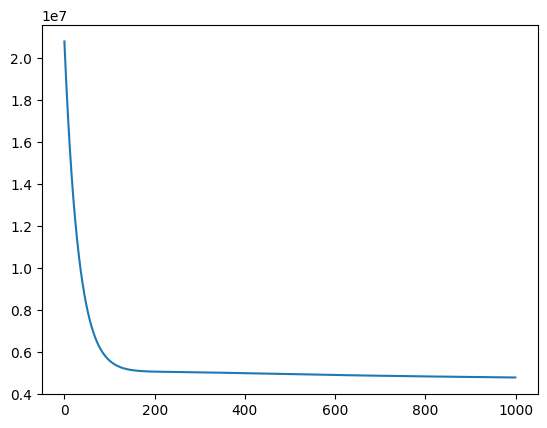

In [19]:
regr = BasicLinearRegression()
regr.fit(X_train, y_train, plot=True)
pred = regr.predict(X_test)
pred

In [20]:
pred_train = regr.predict(X_train)

In [21]:
mean_squared_error(y_test, pred)

5340232.682599624

In [22]:
mean_absolute_error(y_test, pred)

1005.9473656536355

In [23]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR common", mae_train, mae_test]
print(mae_test, mae_train)

1005.9473656536355 1195.6183460981695


In [24]:
root_mean_squared_error(y_test, pred)

2310.8943469141172

In [25]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2310.8943469141172 24577.44149169709


In [26]:
r2_score(y_test, pred)

0.26681863821279284

In [27]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR common", r2_train, r2_test]
print(r2_test, r2_train)

0.26681863821279284 0.0046079293137970545


#### LR SGD

array([2133.33330576,  533.33332644, 2933.33329542, ..., 2666.6666322 ,
       1599.99997932, 2399.99996898], shape=(9871,))

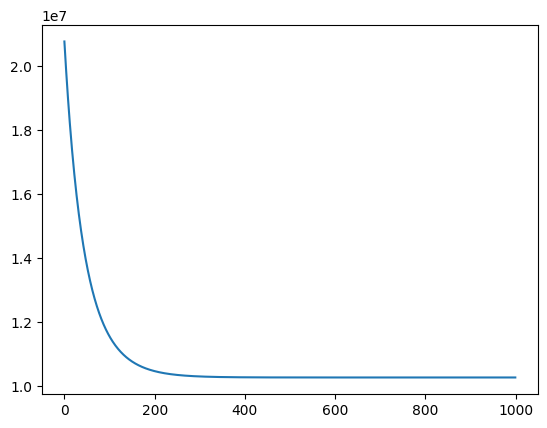

In [28]:
regr = BasicLinearRegression()
regr.fit(X_train, y_train, mode='batch', plot=True)
pred = regr.predict(X_test)
pred

In [29]:
pred_train = regr.predict(X_train)

In [30]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR SGD", mae_train, mae_test]
print(mae_test, mae_train)

2002.5653127015767 2231.4108512843695


In [31]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR SGD", rmse_train, rmse_test]
print(rmse_test, rmse_train)

3214.356555625155 24713.436154663435


In [32]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR SGD", r2_train, r2_test]
print(r2_test, r2_train)

-0.4185326462504959 -0.006438177821753488


#### LR mini-batch

array([3878.78165692, 2131.35560066, 6449.41792644, ..., 4300.60983776,
       4157.09954603, 5574.18928697], shape=(9871,))

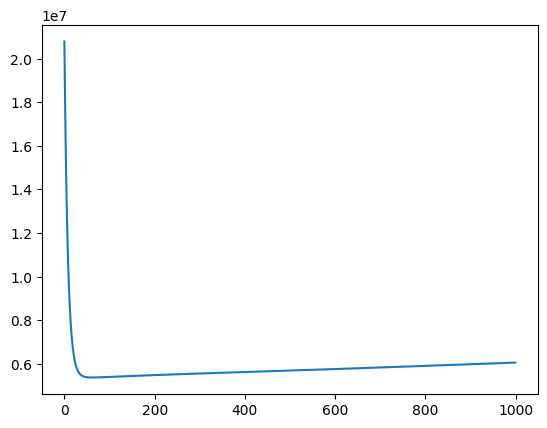

In [33]:
regr = BasicLinearRegression()
regr.fit(X_train, y_train, mode='batch', batch_size=4, plot=True)
pred = regr.predict(X_test)
pred

In [34]:
pred_train = regr.predict(X_train)

In [35]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR mini-batch", mae_train, mae_test]
print(mae_test, mae_train)

1325.222328415985 1517.5430546172831


In [36]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR mini-batch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2545.14584252121 24606.17597430713


In [37]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR mini-batch", r2_train, r2_test]
print(r2_test, r2_train)

0.11064206816251121 0.0022790623259133502


#### LR sklearn-like

In [38]:
regr = BasicLinearRegression()
regr.fit(X_train, y_train, mode='sklearn-like', plot=True)
pred = regr.predict(X_test)
pred

No loss graph possible for sklearn-like model


array([2519.51988568, 2621.16727539, 6125.88205931, ..., 2735.45221389,
       3030.66256634, 2979.25281994], shape=(9871,))

In [39]:
pred_train = regr.predict(X_train)

In [40]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR sklearn_like", mae_train, mae_test]
print(mae_test, mae_train)

1072.1903591265839 1243.8806295323122


In [41]:
rmse_train = root_mean_squared_error(y_train, pred_train)
rmse_test = root_mean_squared_error(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR sklearn-like", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2297.605896830165 24565.043875690844


In [42]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR sklearn-like", r2_train, r2_test]
print(r2_test, r2_train)

0.27522649256827525 0.005611888673157539


#### LR control

In [43]:
true_regr = LinearRegression()
true_regr.fit(X_train, y_train)
pred_regr = true_regr.predict(X_test)
pred_regr

array([2524.24440179, 2551.84817062, 6180.84686357, ..., 2738.12092719,
       2953.05842294, 2940.19901427], shape=(9871,))

In [44]:
pred_train = true_regr.predict(X_train)

In [45]:
mean_squared_error(y_test, pred_regr)

5282890.316573448

In [46]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_regr)
results_mae.loc[len(results_mae)] = ["sklearn_LR", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

1071.5769112978574 1243.7486045932521


In [47]:
rmse_train = root_mean_squared_error(y_train, pred_train)
rmse_test = root_mean_squared_error(y_test, pred_regr)
results_rmse.loc[len(results_rmse)] = ["sklearn_LR", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2298.4538969867217 24564.973084974972


In [48]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_regr)
results_r2.loc[len(results_r2)] = ["sklearn_LR", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.27469139517114805 0.005617619853218292


### Results

In [49]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---


In [50]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---


In [51]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---


## 5. Regularized models implementation — Ridge, Lasso, ElasticNet

+ Реализуйте алгоритмы Ridge, Lasso и ElasticNet: расширьте функцию потерь с помощью L2, L1 и обеих регуляризаций соответственно.
+ Сделайте прогнозы с помощью вашего алгоритма и оцените модель с помощью метрик MAE, RMSE и R2.
+ Инициализируйте функции Ridge(), Lasso() и ElasticNet() из sklearn.linear_model, обучите модель и сделайте прогнозы для обучающей и тестовой выборок, как в предыдущем уроке.
+ Сравните метрики качества и убедитесь, что разница невелика (между вашей реализацией и sklearn).
+ Сохраните метрики, как в предыдущем уроке, в таблице со столбцами model, train, test для таблицы MAE, таблицы RMSE и коэффициента R2.

## Ridge

In [52]:
class RidgeLinearRegression:
    def __init__(self, lr=0.001, alpha=1.0) -> None:
        self.weights = np.array([])
        self.bias = 0
        self.lr = lr
        self.alpha = alpha

    def _loss_function(self, y_true, y_pred):

        # Mean squared error + L2

        if len(y_true) == len(y_pred):
            loss = np.sum((y_pred - y_true) ** 2)
            loss /= len(y_true)

            penalty = self.alpha * np.sum(self.weights ** 2)
            return loss + penalty
        else:
            raise Exception(f"Result output doesn't match shape: need {y_true.shape}, got {y_pred.shape}")

    def _grad(self, X: np.ndarray, y_true: np.ndarray, 
                        y_pred: np.ndarray):
        n_samples = len(y_true)
        
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y_true)) + (2 * self.alpha * self.weights)
        db = (2 / n_samples) * np.sum(y_pred - y_true)

        return dw, db
    
    def _batch(self, X: np.ndarray, y_true: np.ndarray):

        n_samples = len(y_true)
            
        pred = X.dot(self.weights)
        errors = pred - y_true

        dw = (2 / n_samples) * np.dot(X.T, errors) + (2 * self.alpha * self.weights)
        db = (2 / n_samples) * np.sum(pred - y_true)

        return dw, db

    def fit(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            plot=False
            ):

        X_work = np.array(X)
        y_work = np.array(y)

        self.weights = np.zeros(X_work.shape[1])
        
        losses = []

        split_index = int(len(X_work) * 0.8)
        train = X_work[:split_index]
        val = X_work[split_index:]
        y_train = y_work[:split_index]
        y_val = y_work[split_index:]

        for i in range(n_iter):
            if mode == 'batch':
                indices = np.random.permutation(batch_size)
                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)

                for i, idx in enumerate(indices):            
                    xi = train[idx:idx+batch_size] 
                    yi = y_train[idx:idx+batch_size]
                    dw, db = self._batch(xi, yi)
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db

            else:
                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)

                dw, db = self._grad(train, y_train, pred)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            if verbose:
                print(f"Epoche: {i + 1} / {n_iter}, loss: {loss:.4f}")
        
        if plot:
            plt.plot(losses)

    def predict(self, 
                X
                ):
        if type(X) is not np.ndarray:
            X_work = np.array(X)
        else:
            X_work = X
        return (X_work.dot(self.weights) + self.bias)
    
    def fit_predict(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            ):
        
        self.fit(X, y, n_iter, batch_size, mode, verbose)

        return self.predict(X)

### Ridge common

array([3640.17069095, 2109.79101444, 5238.497418  , ..., 3543.85878254,
       3434.78855226, 4357.97278708], shape=(9871,))

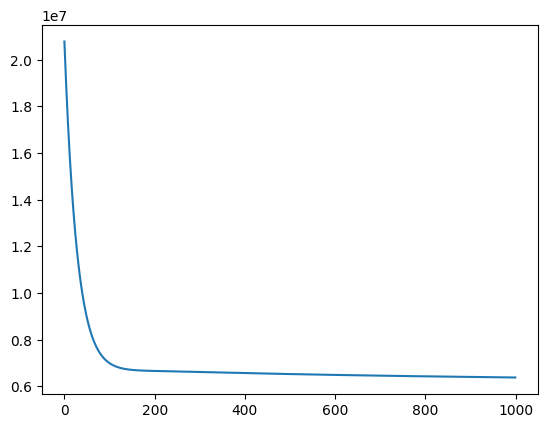

In [53]:
ridge = RidgeLinearRegression()
ridge.fit(X_train, y_train, plot=True)
pred = ridge.predict(X_test)
pred

In [54]:
pred_train = ridge.predict(X_train)

In [55]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["ridge_common", mae_train, mae_test]
print(mae_test, mae_train)

918.845512123028 1117.5534265115625


In [56]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["ridge_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2338.176103090506 24588.073226225966


In [57]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["ridge_common", r2_train, r2_test]
print(r2_test, r2_train)

0.24940499321784548 0.003746567629882902


#### Ridge Stochastic

array([2375.99999681,  935.99999923, 3095.9999956 , ..., 2855.999996  ,
       1895.99999762, 2615.99999641], shape=(9871,))

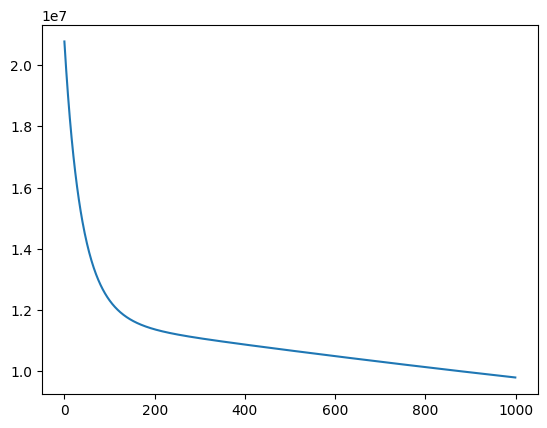

In [58]:
ridge = RidgeLinearRegression()
ridge.fit(X_train, y_train, mode='batch', plot=True)
pred = ridge.predict(X_test)
pred

In [59]:
pred_train = ridge.predict(X_train)

In [60]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Ridge_Stoch", mae_train, mae_test]
print(mae_test, mae_train)

1721.9373946000915 1951.1780626147715


In [61]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Ridge_Stoch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

3051.2023943692534 24690.352839625135


In [62]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Ridge_Stoch", r2_train, r2_test]
print(r2_test, r2_train)

-0.2781836822251933 -0.0045589506989098805


#### Ridge mini-batch

array([4578.54184651, 2272.94740621, 5306.63714951, ..., 4403.29128849,
       3904.38857022, 5413.66632505], shape=(9871,))

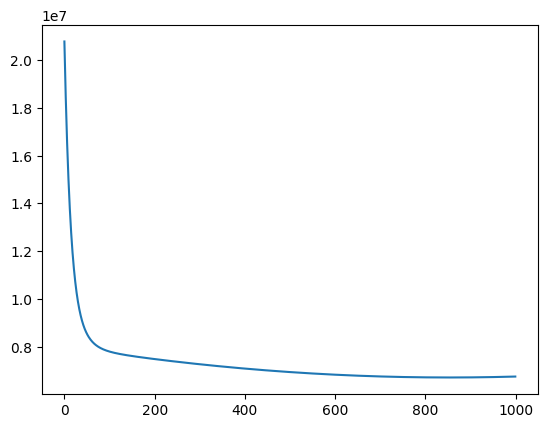

In [63]:
ridge = RidgeLinearRegression()
ridge.fit(X_train, y_train, mode='batch', batch_size=2, plot=True)
pred = ridge.predict(X_test)
pred

In [64]:
pred_train = ridge.predict(X_train)

In [65]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Ridge mini-batch", mae_train, mae_test]
print(mae_test, mae_train)

1100.383025042735 1296.8295480999955


In [66]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Ridge mini-batch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2440.3109826175128 24602.537562633628


In [67]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Ridge mini-batch", r2_train, r2_test]
print(r2_test, r2_train)

0.18239867840123958 0.002574098102709921


### Ridge control

In [68]:
true_ridge = Ridge()
true_ridge.fit(X_train, y_train)
pred_ridge = true_ridge.predict(X_test)
pred_ridge

array([2524.51376455, 2551.7949742 , 6180.69551855, ..., 2738.25184211,
       2953.21734641, 2940.48526253], shape=(9871,))

In [69]:
pred_train = true_ridge.predict(X_train)

In [70]:
mean_squared_error(y_test, pred_ridge)

5282703.157082537

In [71]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_ridge)
results_mae.loc[len(results_mae)] = ["sklearn_ridge", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

1071.500772027231 1243.6744973467314


In [72]:
rmse_train = root_mean_squared_error(y_train, pred_train)
rmse_test = root_mean_squared_error(y_test, pred_ridge)
results_rmse.loc[len(results_rmse)] = ["sklearn_ridge", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2298.4131824114083 24564.973086350852


In [73]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_ridge)
results_r2.loc[len(results_r2)] = ["sklearn_ridge", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.27471709102722275 0.0056176197418278395


### Results

In [74]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [75]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [76]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


## Lasso

In [77]:
class LassoLinearRegression:
    def __init__(self, lr=0.001, alpha=1.0) -> None:
        self.weights = np.array([])
        self.bias = 0
        self.lr = lr
        self.alpha = alpha

    def _loss_function(self, y_true, y_pred):

        # Mean squared error + L1

        if len(y_true) == len(y_pred):
            loss = np.sum((y_pred - y_true) ** 2)
            loss /= len(y_true)

            penalty = self.alpha * np.sum(np.abs(self.weights))
            return loss + penalty
        else:
            raise Exception(f"Result output doesn't match shape: need {y_true.shape}, got {y_pred.shape}")

    def _grad(self, X: np.ndarray, y_true: np.ndarray, 
                        y_pred: np.ndarray):
        n_samples = len(y_true)
        
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y_true)) + (self.alpha * np.sign(self.weights))
        db = (2 / n_samples) * np.sum(y_pred - y_true)

        return dw, db
    
    def _batch(self, X: np.ndarray, y_true: np.ndarray):

        n_samples = len(y_true)
            
        pred = X.dot(self.weights)
        errors = pred - y_true

        dw = (2 / n_samples) * np.dot(X.T, errors) + (self.alpha * np.sign(self.weights))
        db = (2 / n_samples) * np.sum(pred - y_true)

        return dw, db

    def fit(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            plot=False,
            ):

        X_work = np.array(X)
        y_work = np.array(y)

        self.weights = np.zeros(X_work.shape[1])
        
        losses = []

        split_index = int(len(X_work) * 0.8)
        train = X_work[:split_index]
        val = X_work[split_index:]
        y_train = y_work[:split_index]
        y_val = y_work[split_index:]
        
        for i in range(n_iter):
            if mode == 'batch':

                indices = np.random.permutation(batch_size)

                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)

                for i, idx in enumerate(indices):            
                    xi = train[idx:idx+batch_size] 
                    yi = y_train[idx:idx+batch_size]
                    dw, db = self._batch(xi, yi)
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db

            else:
                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)
                
                dw, db = self._grad(train, y_train, pred)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            if verbose:
                print(f"Epoche: {i + 1} / {n_iter}, loss: {loss:.4f}")

        if plot:
            plt.plot(losses)

    def predict(self, 
                X
                ):
        if type(X) is not np.ndarray:
            X_work = np.array(X)
        else:
            X_work = X
        return (X_work.dot(self.weights) + self.bias)
    
    def fit_predict(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            ):
        
        self.fit(X, y, n_iter, batch_size, mode, verbose)

        return self.predict(X)

#### Lasso common

array([3642.93657693, 2126.1639786 , 6024.74677287, ..., 3544.90763633,
       3369.54661224, 4379.31939912], shape=(9871,))

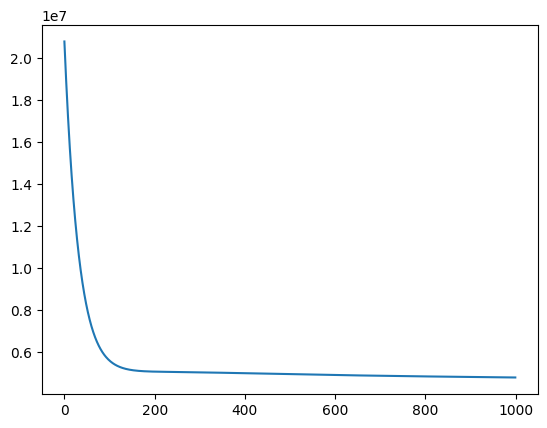

In [78]:
lasso = LassoLinearRegression()
lasso.fit(X_train, y_train, plot=True)
pred = lasso.predict(X_test)
pred

In [79]:
pred_train = lasso.predict(X_train)

In [80]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["lasso_common", mae_train, mae_test]
print(mae_test, mae_train)

1005.7992371194177 1195.487037432046


In [81]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["lasso_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2310.8908445408806 24577.446417850962


In [82]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["lasso_common", r2_train, r2_test]
print(r2_test, r2_train)

0.26682086061888133 0.004607530293012307


#### Lasso Stochastic

array([2133.88786132,  534.22121533, 2933.72118431, ..., 2667.11007665,
       1600.66564599, 2400.49896898], shape=(9871,))

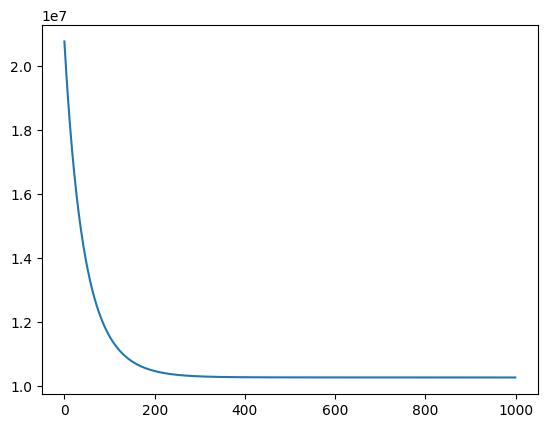

In [83]:
lasso = LassoLinearRegression()
lasso.fit(X_train, y_train, mode='batch', plot=True)
pred = lasso.predict(X_test)
pred

In [84]:
pred_train = lasso.predict(X_train)

In [85]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Lasso_Stoch", mae_train, mae_test]
print(mae_test, mae_train)

2001.9224464605047 2230.7691836525078


In [86]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Lasso_Stoch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

3213.965976001665 24713.379954330776


In [87]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Lasso_Stoch", r2_train, r2_test]
print(r2_test, r2_train)

-0.4181879326036322 -0.006433600384951443


#### Lasso mini-batch

array([3931.80516458, 1890.65426757, 5681.9082409 , ..., 3557.15327561,
       2880.59259743, 4691.77146395], shape=(9871,))

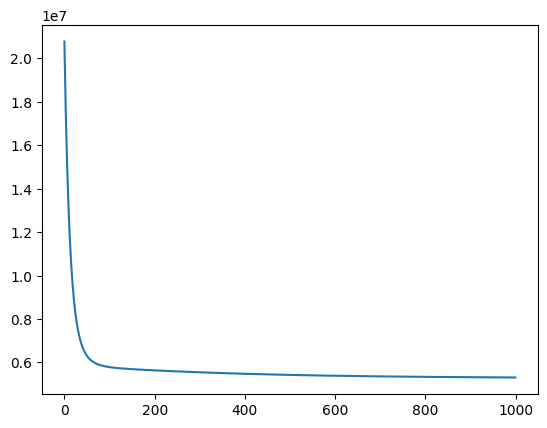

In [88]:
lasso = LassoLinearRegression()
lasso.fit(X_train, y_train, mode='batch', batch_size=3, plot=True)
pred = lasso.predict(X_test)
pred

In [89]:
pred_train = lasso.predict(X_train)

In [90]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Lasso mini-batch", mae_train, mae_test]
print(mae_test, mae_train)

997.3856052974162 1195.9462385503136


In [91]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Lasso mini-batch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2387.5917763119037 24597.23341162969


In [92]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Lasso mini-batch", r2_train, r2_test]
print(r2_test, r2_train)

0.21734316090340133 0.0030041291339866216


### Lasso control

In [93]:
true_lasso = Lasso()
true_lasso.fit(X_train, y_train)
pred_lasso = true_lasso.predict(X_test)
pred_lasso

array([2531.15014845, 2540.23626339, 6162.81867899, ..., 2725.54919368,
       2975.85208801, 2928.50548405], shape=(9871,))

In [94]:
pred_train = true_lasso.predict(X_train)

In [95]:
mean_squared_error(y_test, pred_ridge)

5282703.157082537

In [96]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_lasso)
results_mae.loc[len(results_mae)] = ["sklearn_lasso", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

1067.4958094261638 1239.9069945167103


In [97]:
rmse_train = root_mean_squared_error(y_train, pred_train)
rmse_test = root_mean_squared_error(y_test, pred_lasso)
results_rmse.loc[len(results_rmse)] = ["sklearn_lasso", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2296.8598445148223 24564.981524556428


In [98]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_lasso)
results_r2.loc[len(results_r2)] = ["sklearn_lasso", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.2756970964834432 0.005616936589898036


### Results

In [99]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [100]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [101]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


## ElasticNet

In [102]:
class ElasticNetRegression:
    def __init__(self, lr=0.001, alpha=1.0, l1_ratio=0.5) -> None:
        self.weights = np.array([])
        self.bias = 0
        self.lr = lr
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def _loss_function(self, y_true, y_pred):

        # Mean squared error + L1

        if len(y_true) == len(y_pred):
            loss = np.sum((y_pred - y_true) ** 2)
            loss /= len(y_true)

            lasso_penalty = self.l1_ratio * np.sum(np.abs(self.weights))
            ridge_penalty = 0.5 * (1 - self.l1_ratio) * np.sum(self.weights ** 2)
            return loss + self.alpha * (lasso_penalty + ridge_penalty)
        else:
            raise Exception(f"Result output doesn't match shape: need {y_true.shape}, got {y_pred.shape}")

    def _grad(self, X: np.ndarray, y_true: np.ndarray, 
                        y_pred: np.ndarray):
        n_samples = len(y_true)
        
        dw = (2 / n_samples) * np.dot(X.T, (y_pred - y_true))
        dw_l1 = self.alpha * self.l1_ratio * np.sign(self.weights)
        dw_l2 = self.alpha * (1 - self.l1_ratio) * self.weights
        db = (2 / n_samples) * np.sum(y_pred - y_true)

        return dw + dw_l1 + dw_l2, db
    
    def _batch(self, X: np.ndarray, y_true: np.ndarray):

        n_samples = len(y_true)
            
        pred = X.dot(self.weights)
        errors = pred - y_true

        dw = (2 / n_samples) * np.dot(X.T, errors)
        dw_l1 = self.alpha * self.l1_ratio * np.sign(self.weights)
        dw_l2 = self.alpha * (1 - self.l1_ratio) * self.weights

        db = (2 / n_samples) * np.sum(errors)

        return dw + dw_l1 + dw_l2, db

    def fit(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            plot=False
            ):

        X_work = np.array(X)
        y_work = np.array(y)

        self.weights = np.zeros(X_work.shape[1])

        losses = []

        split_index = int(len(X_work) * 0.8)
        train = X_work[:split_index]
        val = X_work[split_index:]
        y_train = y_work[:split_index]
        y_val = y_work[split_index:]
        
        for i in range(n_iter):
            if mode == 'batch':
                indices = np.random.permutation(batch_size)

                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)

                for i, idx in enumerate(indices):            
                    xi = train[idx:idx+batch_size] 
                    yi = y_train[idx:idx+batch_size]
                    dw, db = self._batch(xi, yi)
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db

            else:
                pred = self.predict(val)
                loss = self._loss_function(y_val, pred)
                losses.append(loss)

                pred = self.predict(train)
                
                dw, db = self._grad(train, y_train, pred)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            if verbose:
                print(f"Epoche: {i + 1} / {n_iter}, loss: {loss:.4f}")
        
        if plot:
            plt.plot(losses)

    def predict(self, 
                X
                ):
        if type(X) is not np.ndarray:
            X_work = np.array(X)
        else:
            X_work = X
        return (X_work.dot(self.weights) + self.bias)
    
    def fit_predict(
            self, 
            X, 
            y, 
            n_iter=1000, 
            batch_size=1, 
            mode: Literal['auto', 'batch'] = 'auto', 
            verbose=False,
            ):
        
        self.fit(X, y, n_iter, batch_size, mode, verbose)

        return self.predict(X)

#### ElasticNet common

array([3661.89319543, 2090.94556454, 5787.28528739, ..., 3563.72608347,
       3408.11655384, 4413.07520263], shape=(9871,))

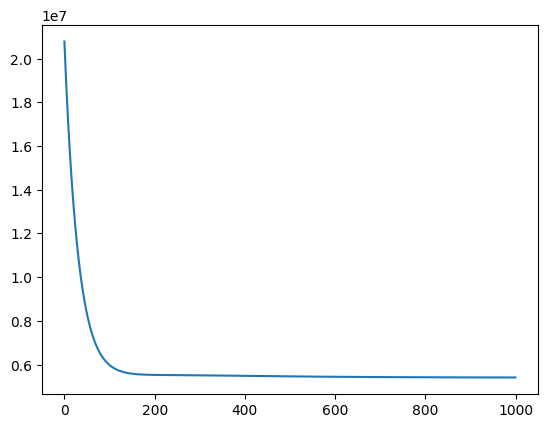

In [103]:
en = ElasticNetRegression()
en.fit(X_train, y_train, plot=True)
pred = en.predict(X_test)
pred

In [104]:
pred_train = en.predict(X_train)

In [105]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["elastic_common", mae_train, mae_test]
print(mae_test, mae_train)

968.5603526772245 1161.1653465023708


In [106]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["elastic_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2311.2210147345095 24580.148927071026


In [107]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["elastic_common", r2_train, r2_test]
print(r2_test, r2_train)

0.26661133865705655 0.004388613715666234


#### ElasticNet Stochastic

array([2198.66348576,  642.06890326, 2976.96077701, ..., 2717.52834659,
       1679.79862492, 2458.09591618], shape=(9871,))

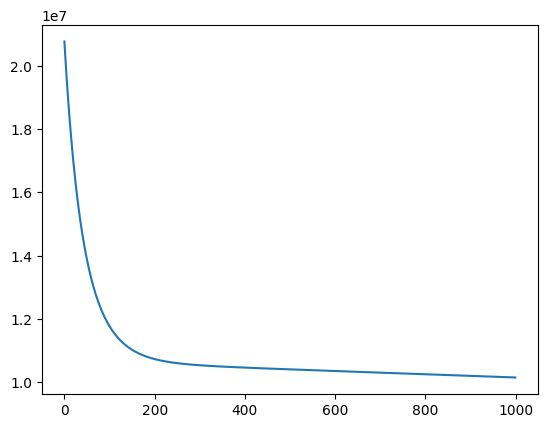

In [108]:
en = ElasticNetRegression()
en.fit(X_train, y_train, mode='batch', plot=True)
pred = en.predict(X_test)
pred

In [109]:
pred_train = en.predict(X_train)

In [110]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["elastic_stoch", mae_train, mae_test]
print(mae_test, mae_train)

1925.7516423424602 2154.75368554226


In [111]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["elastic_stoch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

3168.4450565318075 24706.86588753947


In [112]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["elastic_stoch", r2_train, r2_test]
print(r2_test, r2_train)

-0.37829949448788147 -0.005903109478497814


#### ElasticNet mini-batch

array([3873.98900363, 1388.131858  , 4654.56178101, ..., 3675.29105705,
       3147.34333077, 4801.79545445], shape=(9871,))

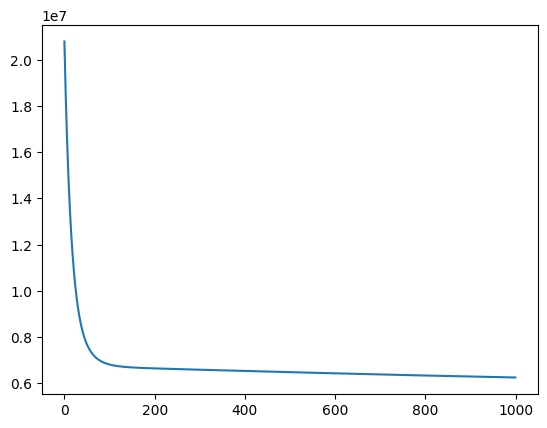

In [113]:
en = ElasticNetRegression()
en.fit(X_train, y_train, mode='batch', batch_size=2, plot=True)
pred = en.predict(X_test)
pred

In [114]:
pred_train = lasso.predict(X_train)

In [115]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Elastic mini-batch", mae_train, mae_test]
print(mae_test, mae_train)

1052.242429190318 1195.9462385503136


In [116]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Elastic mini-batch", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2494.877190687821 24597.23341162969


In [117]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Elastic mini-batch", r2_train, r2_test]
print(r2_test, r2_train)

0.14542618610823488 0.0030041291339866216


#### ElasticNet control

In [118]:
en_true = ElasticNet()
en_true.fit(X_train, y_train)
pred_en = en_true.predict(X_test)
pred_en

array([3656.68404157, 2623.06539519, 5264.36851155, ..., 3456.34644467,
       3651.38434449, 4292.91435207], shape=(9871,))

In [119]:
pred_train = en_true.predict(X_train)

In [120]:
mean_squared_error(y_test, pred_ridge)

5282703.157082537

In [121]:
mae_train = mean_absolute_error(y_train, pred_train)
mae_test = mean_absolute_error(y_test, pred_en)
results_mae.loc[len(results_mae)] = ["sklearn_ElasticNet", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

983.2795915329013 1174.2167357056082


In [122]:
rmse_train = root_mean_squared_error(y_train, pred_train)
rmse_test = root_mean_squared_error(y_test, pred_en)
results_rmse.loc[len(results_rmse)] = ["sklearn_ElasticNet", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2336.8908587740916 24585.21515405899


In [123]:
r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_en)
results_r2.loc[len(results_r2)] = ["sklearn_ElasticNet", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.2502299377790562 0.003978159482887156


### Results

In [124]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [125]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [126]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


## 6. Feature normalization

+ Сначала приведите несколько примеров того, почему и где нормализация признаков обязательна, и наоборот.

+ Рассмотрим первый из классических методов нормализации — MinMaxScaler. Напишите математическую формулу для этого метода.

+ Реализуйте собственную функцию или класс для нормализации признаков с помощью MinMaxScaler.
+ Инициализируйте MinMaxScaler() из sklearn.preprocessing.
+ Сравните нормализацию признаков с вашим собственным методом и с методом sklearn.
+ Повторите шаги для другого метода нормализации — StandardScaler.

## MinMaxScaler

#### Формула

Для произвольного диапазона [a, b]:

`X_scaled = a + (X - X_min) * (b - a) / (X_max - X_min)`

Где:

 + X — исходное значение

 + X_min — минимальное значение признака в данных

 + X_max — максимальное значение признака в данных

In [127]:
class MinMaxScalerEx:
    def __init__(self, feature_range=(0, 1)) -> None:
        self.feature_range = feature_range
        self.data_max_ = None
        self.data_in = None
        self.scale_ = None
        self.min_ = None

    def fit(self, X):

        self.data_min_ = X.min(axis=0) 
        self.data_max_ = X.max(axis=0) 
        
        feature_range = self.feature_range 
        data_range = self.data_max_ - self.data_min_ 
        
        data_range[data_range == 0] = 1.0
        
        self.scale_ = ((feature_range[1] - feature_range[0]) / data_range).to_numpy()
        self.min_ = (feature_range[0] - self.data_min_ * self.scale_).to_numpy()
        
        return self

    def transform(self, X):
        if self.data_min_ is None or self.data_max_ is None:
            raise ValueError("Scaler not fitted yet (((")
            
        X = np.array(X, dtype=float)
        X_scaled = X * self.scale_ + self.min_
        return X_scaled

    def fit_transform(self, X):
        
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_scaled):
        if self.scale_ is None or self.min_ is None:
            raise ValueError("Scaler not fitted yet (((")
            
        X_scaled = np.array(X_scaled)
        X_original = (X_scaled - self.min_) / self.scale_
        return X_original


#### MinMaxScaler common

In [128]:
sc = MinMaxScalerEx()
sc.fit(X_train)
scaled_data_minmax = sc.transform(X_train)
scaled_test_minmax = sc.transform(X_test)
scaled_data_minmax[:5]

array([[0.14285714, 0.125     , 0.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.21428571, 0.375     , 0.        , 0.        , 0.        ,
        0.       

#### MinMaxScaler control

In [129]:
sc_control = MinMaxScaler()
sc_control.fit(X_train)
scaled_data_control = sc_control.transform(X_train)
scaled_data_control[:5]

array([[0.14285714, 0.125     , 0.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.21428571, 0.375     , 0.        , 0.        , 0.        ,
        0.       

In [130]:
X_train.head()

,bathrooms,bedrooms,Elevator,CatsAllowed,HardwoodFloors,DogsAllowed,Doorman,Dishwasher,NoFee,LaundryinBuilding,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
4,1.0,1,0,1,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
6,1.0,2,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,1.0,2,1,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
10,1.5,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1.0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


##  StandartScaler

#### Формулы:

1. Вычисление среднего:

    `mean = (x₁ + x₂ + ... + xₙ) / n`

2. Вычисление стандартного отклонения:

    `std = sqrt( Σ(xᵢ - mean)² / n )`  # для популяции

    или

    `std = sqrt( Σ(xᵢ - mean)² / (n-1) )`  # для выборки (по умолчанию в sklearn)

3. Стандартизация:

    `z = (x - mean) / std`

In [131]:
class StandardScalerEx:
    def __init__(self, with_mean=True, with_std=True, ddof=0):

        self.with_mean = with_mean
        self.with_std = with_std
        self.ddof = ddof
        
        self.mean_ = None      # mean каждого признака
        self.scale_ = None     # std каждого признака
        self.var_ = None       # дисперсия каждого признака
        self.n_samples_seen_ = None  # количество  samples
        
    def fit(self, X):

        X = np.asarray(X, dtype=float)
        n_samples, n_features = X.shape
        
        if self.with_mean:
            self.mean_ = np.mean(X, axis=0)
        else:
            self.mean_ = np.zeros(n_features)
        
        if self.with_std:
            self.var_ = np.var(X, axis=0, ddof=self.ddof)
            
            self.scale_ = np.sqrt(self.var_)
            self.scale_[self.scale_ == 0] = 1.0  # если std=0, устанавливаем 1
        else:
            self.var_ = np.ones(n_features)
            self.scale_ = np.ones(n_features)
        
        self.n_samples_seen_ = n_samples
        
        return self
    
    def transform(self, X):

        if self.mean_ is None or self.scale_ is None:
            raise ValueError("Not fitted yet (((")
        
        X = np.asarray(X, dtype=float)
        
        if self.with_mean:
            X_centered = X - self.mean_[np.newaxis, :]
        else:
            X_centered = X
        
        if self.with_std:
            X_scaled = X_centered / self.scale_[np.newaxis, :]
        else:
            X_scaled = X_centered
        
        return X_scaled
    
    def fit_transform(self, X):
        
        return self.fit(X).transform(X)

#### StandartScaler common

In [132]:
sc = StandardScalerEx()
sc.fit(X_train)
scaled_data_std = sc.transform(X_train)
scaled_test_std = sc.transform(X_test)
scaled_data_std[:5]

array([[-0.4250063 , -0.49341583, -1.05011311,  1.04378857,  1.05085992,
         1.11067258, -0.85517195,  1.19322375, -0.75796863,  1.42502823,
        -0.60711373,  2.09152803, -0.4620532 , -0.39136636, -0.34392373,
         2.93043019, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [-0.4250063 ,  0.40092585,  0.95227837, -0.95804843,  1.05085992,
        -0.90035535,  1.16935547,  1.19322375,  1.31931581,  1.42502823,
        -0.60711373, -0.47811934, -0.4620532 , -0.39136636, -0.34392373,
        -0.34124683, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [-0.4250063 ,  0.40092585,  0.95227837, -0.95804843,  1.05085992,
        -0.90035535,  1.16935547,  1.19322375, -0.75796863,  1.42502823,
        -0.60711373, -0.47811934,  2.16425294, -0.39136636, -0.34392373,
        -0.34124683, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [ 0.56605588

#### StandartScaler control

In [133]:
sc_control = StandardScaler()
sc_control.fit(X_train)
scaled_data_control = sc_control.transform(X_train)
scaled_data_control[:5]

array([[-0.4250063 , -0.49341583, -1.05011311,  1.04378857,  1.05085992,
         1.11067258, -0.85517195,  1.19322375, -0.75796863,  1.42502823,
        -0.60711373,  2.09152803, -0.4620532 , -0.39136636, -0.34392373,
         2.93043019, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [-0.4250063 ,  0.40092585,  0.95227837, -0.95804843,  1.05085992,
        -0.90035535,  1.16935547,  1.19322375,  1.31931581,  1.42502823,
        -0.60711373, -0.47811934, -0.4620532 , -0.39136636, -0.34392373,
        -0.34124683, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [-0.4250063 ,  0.40092585,  0.95227837, -0.95804843,  1.05085992,
        -0.90035535,  1.16935547,  1.19322375, -0.75796863,  1.42502823,
        -0.60711373, -0.47811934,  2.16425294, -0.39136636, -0.34392373,
        -0.34124683, -0.30756539, -0.25581535, -0.24245431, -0.23239439,
        -0.2336027 , -0.2201478 ],
       [ 0.56605588

## 7. Fit custom and sklearn models with normalized data

+ Обучите все модели — линейную регрессию, Ridge, Lasso и ElasticNet — с помощью MinMaxScaler.
+ Обучите все модели — линейную регрессию, Ridge, Lasso и ElasticNet — с помощью StandardScaler.
+ Добавьте все результаты в наш датафрейм с метриками.

## Models MaxMinScaler

#### LR

In [134]:
regr = BasicLinearRegression()
regr.fit(scaled_data_minmax, y_train)
pred = regr.predict(scaled_test_minmax)
pred

array([3436.70076938, 2492.57807403, 5605.83350525, ..., 5337.31742832,
       3008.80584934, 3698.53631428], shape=(9871,))

In [135]:
pred_train = regr.predict(scaled_data_minmax)

In [136]:
mean_squared_error(y_test, pred)

7114897.969420367

In [137]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR minmax", mae_train, mae_test]
print(mae_test, mae_train)

1334.2542396814486 1532.376956856989


In [138]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR minmax", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2667.3766080964956 24620.922426771922


In [139]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR minmax", r2_train, r2_test]
print(r2_test, r2_train)

0.023167923151756087 0.0010828380047420705


#### Ridge

In [140]:
ridge = RidgeLinearRegression()
ridge.fit(scaled_data_minmax, y_train)
pred = ridge.predict(scaled_test_minmax)
pred

array([3309.72480332, 2705.93061497, 4635.64800182, ..., 4378.27240604,
       3038.29698359, 3498.82103132], shape=(9871,))

In [141]:
pred_train = ridge.predict(scaled_data_minmax)

In [142]:
mean_squared_error(y_test, pred)

6922595.880466836

In [143]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Ridge minmax", mae_train, mae_test]
print(mae_test, mae_train)

1177.5252578487043 1388.4399894774972


In [144]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Ridge minmax", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2631.0826441727054 24625.25356910609


In [145]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Ridge minmax", r2_train, r2_test]
print(r2_test, r2_train)

0.049569826558114594 0.0007313619005215877


#### Lasso

In [146]:
lasso = LassoLinearRegression()
lasso.fit(scaled_data_minmax, y_train)
pred = lasso.predict(scaled_test_minmax)
pred

array([3436.2727064 , 2493.47431374, 5603.7978593 , ..., 5335.00739767,
       3007.40222766, 3697.835907  ], shape=(9871,))

In [147]:
pred_train = lasso.predict(scaled_data_minmax)

In [148]:
mean_squared_error(y_test, pred)

7114386.379928711

In [149]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Lasso minmax", mae_train, mae_test]
print(mae_test, mae_train)

1333.9402251100419 1532.0920855643676


In [150]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Lasso minmax", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2667.280708873498 24620.916331643195


In [151]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Lasso minmax", r2_train, r2_test]
print(r2_test, r2_train)

0.0232381612672955 0.0010833325863688348


#### ElasticNet

In [152]:
en = ElasticNetRegression()
en.fit(scaled_data_minmax, y_train)
pred = en.predict(scaled_test_minmax)
pred

array([3388.41994638, 2550.34645759, 5282.0304638 , ..., 5004.71928332,
       3008.93847357, 3630.39023251], shape=(9871,))

In [153]:
pred_train = en.predict(scaled_data_minmax)

In [154]:
mean_squared_error(y_test, pred)

6987774.814148776

In [155]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Elastic minmax", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

1264.434521174622 1468.158473248562


In [156]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Elastic minmax", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2643.439958491355 24621.37242692462


In [157]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Elastic minmax", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.04062115667852806 0.0010463229647653671


## Models StandartScaler

#### LR

In [158]:
regr = BasicLinearRegression()
regr.fit(scaled_data_std, y_train)
pred = regr.predict(scaled_test_std)
pred

array([2246.09622232, 2138.48374087, 5531.92999088, ..., 2625.65828354,
       2449.72616008, 2849.29249895], shape=(9871,))

In [159]:
pred_train = regr.predict(scaled_data_std)

In [160]:
mean_squared_error(y_test, pred)

5239057.439234868

In [161]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR std", mae_train, mae_test]
print(mae_test, mae_train)

992.4258287143938 1173.4871575810978


In [162]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2288.8987394017386 24571.12375434334


In [163]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR std", r2_train, r2_test]
print(r2_test, r2_train)

0.2807093817661642 0.005119603192426325


#### Ridge

In [164]:
ridge = RidgeLinearRegression()
ridge.fit(scaled_data_std, y_train)
pred = ridge.predict(scaled_test_std)
pred

array([2684.30588915, 2448.09175071, 4983.71254192, ..., 3136.99895648,
       2856.621009  , 3224.01702492], shape=(9871,))

In [165]:
pred_train = ridge.predict(scaled_data_std)

In [166]:
mean_squared_error(y_test, pred)

5330092.0499273185

In [167]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Ridge std", mae_train, mae_test]
print(mae_test, mae_train)

868.9542355305025 1067.2502918699079


In [168]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Ridge std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2308.699211661692 24583.317103483256


In [169]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Ridge std", r2_train, r2_test]
print(r2_test, r2_train)

0.26821088520163483 0.004131945149592364


#### Lasso

In [170]:
lasso = LassoLinearRegression()
lasso.fit(scaled_data_std, y_train)
pred = lasso.predict(scaled_test_std)
pred

array([2248.14260191, 2137.77877596, 5533.36562372, ..., 2625.00908096,
       2452.15657853, 2849.35101312], shape=(9871,))

In [171]:
pred_train = lasso.predict(scaled_data_std)

In [172]:
mean_squared_error(y_test, pred)

5238057.6785581745

In [173]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Lasso std", mae_train, mae_test]
print(mae_test, mae_train)

991.7982275481683 1172.8862197420192


In [174]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Lasso std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2288.680335599136 24571.129100807302


In [175]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Lasso std", r2_train, r2_test]
print(r2_test, r2_train)

0.2808466428066405 0.005119170237644188


#### ElasticNet

In [176]:
en = ElasticNetRegression()
en.fit(scaled_data_std, y_train)
pred = en.predict(scaled_test_std)
pred

array([2395.9470412 , 2233.42645999, 5356.11190543, ..., 2812.35056581,
       2591.43448454, 2988.01534843], shape=(9871,))

In [177]:
pred_train = en.predict(scaled_data_std)

In [178]:
mean_squared_error(y_test, pred)

5181834.988946574

In [179]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Elastic std", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

924.1115527219459 1113.1870271932883


In [180]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Elastic std", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2276.364423581289 24573.521132628364


In [181]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Elastic std", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.2885656750254213 0.004925454887334424


#### Results

In [182]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [183]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [184]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


## 8. Overfit models

+ Давайте рассмотрим переобученную модель на практике. Из теории известно, что полиномиальная регрессия легко переобучается. Поэтому давайте создадим простой пример и посмотрим, как работает регуляризация в реальной жизни.
+ В предыдущем уроке мы создали полиномиальные признаки степени 10. Здесь мы повторяем эти шаги из предыдущего урока, помня, что у нас есть только 2 основных признака — «bathrooms и bedrooms.

In [185]:
X_train_tmp = X_train[['bathrooms', 'bedrooms']]
X_train_tmp.head()

,bathrooms,bedrooms
4,1.0,1
6,1.0,2
9,1.0,2
10,1.5,3
15,1.0,0


In [186]:
X_test_tmp = X_test[['bathrooms', 'bedrooms']]
X_test_tmp.head()

,bathrooms,bedrooms
99267,1.0,2
99269,1.0,0
99270,2.0,2
99271,1.0,2
99272,1.0,0


In [187]:
poly = PolynomialFeatures(degree=40)
sc = StandardScalerEx()
X_train_poly = sc.fit_transform(poly.fit_transform(X_train_tmp))
sc = StandardScalerEx()
X_test_poly = sc.fit_transform(poly.fit_transform(X_test_tmp))
# X_train_poly = poly.fit_transform(X_train_tmp)
# X_test_poly = poly.fit_transform(X_test_tmp)


In [188]:
X_train_poly[:3]

array([[ 0.        , -0.4250063 , -0.49341583, ..., -0.00692756,
        -0.00708326, -0.00713602],
       [ 0.        , -0.4250063 ,  0.40092585, ..., -0.00692756,
        -0.00708326, -0.00713602],
       [ 0.        , -0.4250063 ,  0.40092585, ..., -0.00692756,
        -0.00708326, -0.00713602]], shape=(3, 861))

In [189]:
X_test_poly[:3]

array([[ 0.        , -0.41580855,  0.45269949, ..., -0.01035691,
        -0.01025524, -0.01019302],
       [ 0.        , -0.41580855, -1.36306511, ..., -0.01035691,
        -0.01025524, -0.01019302],
       [ 0.        ,  1.63027628,  0.45269949, ..., -0.01035691,
        -0.01025524, -0.01019302]], shape=(3, 861))

+ Обучим все реализованные нами алгоритмы — линейную регрессию, Ridge, Lasso и ElasticNet — на наборе полиномиальных признаков.
+ Сохраним результаты метрик качества в результирующем датафрейме.
+ Проанализируем результаты и выберем лучшую модель по вашему мнению.
+ Дополнительно попробуем разные альфа-параметры регуляризации в алгоритмах, выберем лучший и проанализируем результаты.

#### LR

array([3248.32602193, 2391.56760871, 4823.77900471, ..., 2796.16088525,
       3248.32602193, 3678.08187701], shape=(9871,))

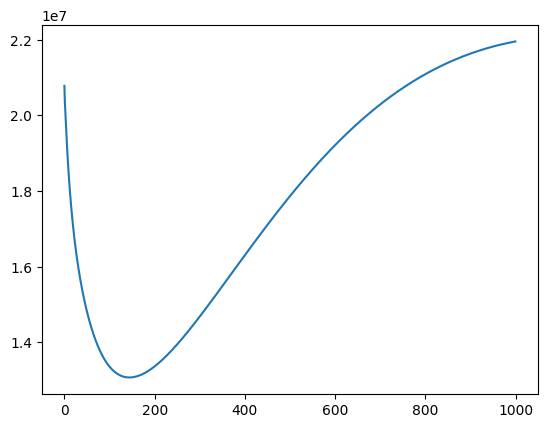

In [190]:
regr = BasicLinearRegression()
regr.fit(X_train_poly, y_train, plot=True)
pred = regr.predict(X_test_poly)
pred

In [191]:
pred_train = regr.predict(X_train_poly)

In [192]:
mean_squared_error(y_test, pred)

6517285.453432493

In [193]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["LR poly", mae_train, mae_test]
print(mae_test, mae_train)

904.4353731404309 1082.1367774096877


In [194]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["LR poly", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2552.897462381224 24652.013269593368


In [195]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["LR poly", r2_train, r2_test]
print(r2_test, r2_train)

0.10521647502867026 -0.0014415829043463724


#### Ridge

array([3225.1300421 , 2562.49358336, 4474.92292288, ..., 2855.01981075,
       3225.1300421 , 3662.14212724], shape=(9871,))

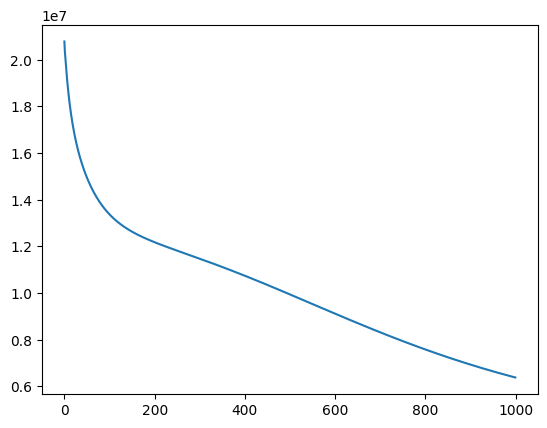

In [196]:
ridge = RidgeLinearRegression()
ridge.fit(X_train_poly, y_train, plot=True)
pred = ridge.predict(X_test_poly)
pred

In [197]:
pred_train = ridge.predict(X_train_poly)

In [198]:
mean_squared_error(y_test, pred)

5019499.259701702

In [199]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Ridge poly", mae_train, mae_test]
print(mae_test, mae_train)

891.2785495482411 1075.5729100208312


In [200]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Ridge poly", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2240.423901787718 24589.19405303729


In [201]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Ridge poly", r2_train, r2_test]
print(r2_test, r2_train)

0.31085338009533137 0.0036557387960929333


#### Lasso

array([3247.24991025, 2390.83207709, 4824.62029519, ..., 2795.45565734,
       3247.24991025, 3676.21904214], shape=(9871,))

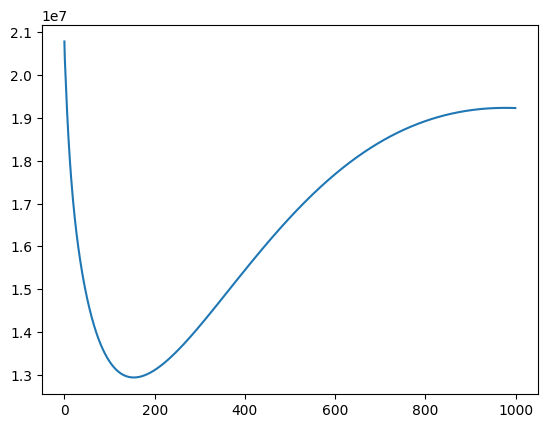

In [202]:
lasso = LassoLinearRegression()
lasso.fit(X_train_poly, y_train, plot=True)
pred = lasso.predict(X_test_poly)
pred

In [203]:
pred_train = lasso.predict(X_train_poly)

In [204]:
mean_squared_error(y_test, pred)

6096096.581078455

In [205]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Lasso poly", mae_train, mae_test]
print(mae_test, mae_train)

901.6676555707102 1081.2452949324172


In [206]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Lasso poly", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2469.027456525839 24640.906739589707


In [207]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Lasso poly", r2_train, r2_test]
print(r2_test, r2_train)

0.1630431371530301 -0.0005394224735979503


#### ElasticNet

array([3237.6174907 , 2444.91995421, 4713.5274539 , ..., 2811.62683634,
       3237.6174907 , 3673.13124713], shape=(9871,))

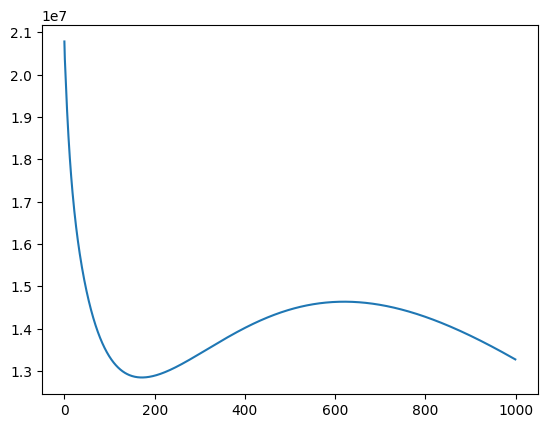

In [208]:
en = ElasticNetRegression()
en.fit(X_train_poly, y_train, plot=True)
pred = en.predict(X_test_poly)
pred

In [209]:
pred_train = en.predict(X_train_poly)

In [210]:
mean_squared_error(y_test, pred)

5462426.746223797

In [211]:
mae_train = get_MAE(y_train, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae.loc[len(results_mae)] = ["Elastic poly", mae_train, mae_test]
results_mae.loc[len(results_mae)] = ["---", "---", "---"]
print(mae_test, mae_train)

895.5542686287698 1076.0675300626635


In [212]:
rmse_train = get_RMSE(y_train, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse.loc[len(results_rmse)] = ["Elastic poly", rmse_train, rmse_test]
results_rmse.loc[len(results_rmse)] = ["---", "---", "---"]
print(rmse_test, rmse_train)

2337.183507177773 24616.57946825512


In [213]:
r2_train = get_R2(y_train, pred_train)
r2_test = get_R2(y_test, pred)
results_r2.loc[len(results_r2)] = ["Elastic poly", r2_train, r2_test]
results_r2.loc[len(results_r2)] = ["---", "---", "---"]
print(r2_test, r2_train)

0.25004213889241655 0.0014352109257953494


#### Results

In [214]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [215]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [216]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


## 9. Naive models

+ Вычислите среднее и медианное значения метрик и добавьте результаты в итоговую таблицу данных.

In [217]:
train_mean = np.full(y_train.shape, y_train.mean())
test_mean = np.full(y_test.shape, y_test.mean())
train_median = np.full(y_train.shape, y_train.median())
test_median = np.full(y_test.shape, y_test.median())

mean_train_mae = mean_absolute_error(y_train, train_mean)
mean_test_mae = mean_absolute_error(y_test, test_mean)
results_mae.loc[len(results_mae)] = ['naive_mean', f'{mean_train_mae:.6f}', f'{mean_test_mae:.6f}']

mean_train_rmse = root_mean_squared_error(y_train, train_mean)
mean_test_rmse = root_mean_squared_error(y_test, test_mean)
results_rmse.loc[len(results_rmse)] = ['naive_mean', f'{mean_train_rmse:.6f}', f'{mean_test_rmse:.6f}']

median_train_mae = mean_absolute_error(y_train, train_median)
median_test_mae = mean_absolute_error(y_test, test_median)
results_mae.loc[len(results_mae)] = ['naive_median', f'{median_train_mae:.6f}', f'{median_test_mae:.6f}']

median_train_rmse = root_mean_squared_error(y_train, train_median)
median_test_rmse = root_mean_squared_error(y_test, test_median)
results_rmse.loc[len(results_rmse)] = ['naive_median', f'{median_train_rmse:.6f}', f'{median_test_rmse:.6f}']

mean_r2_train = r2_score(y_train, train_mean)
mean_r2_test = r2_score(y_test, test_mean)
results_r2.loc[len(results_r2)] = ['naive_mean', f'{mean_r2_train:.6f}', f'{mean_r2_test:.6f}']

median_r2_train = r2_score(y_train, train_median)
median_r2_test = r2_score(y_test, test_median)
results_r2.loc[len(results_r2)] = ['naive_median', f'{median_r2_train:.6f}', f'{median_r2_test:.6f}']

## 10. Compare results

+ Распечатайте итоговые таблицы.
+ Какая модель лучшая?
+ Какая модель наиболее стабильна?

#### Results

In [218]:
results_mae

,model,train,test
0,LR common,1195.618346,1005.947366
1,LR SGD,2231.410851,2002.565313
2,LR mini-batch,1517.543055,1325.222328
3,LR sklearn_like,1243.88063,1072.190359
4,sklearn_LR,1243.748605,1071.576911
5,---,---,---
6,ridge_common,1117.553427,918.845512
7,Ridge_Stoch,1951.178063,1721.937395
8,Ridge mini-batch,1296.829548,1100.383025
9,sklearn_ridge,1243.674497,1071.500772


In [219]:
results_rmse

,model,train,test
0,LR common,24577.441492,2310.894347
1,LR SGD,24713.436155,3214.356556
2,LR mini-batch,24606.175974,2545.145843
3,LR sklearn-like,24565.043876,2297.605897
4,sklearn_LR,24564.973085,2298.453897
5,---,---,---
6,ridge_common,24588.073226,2338.176103
7,Ridge_Stoch,24690.35284,3051.202394
8,Ridge mini-batch,24602.537563,2440.310983
9,sklearn_ridge,24564.973086,2298.413182


In [220]:
results_r2

,model,train,test
0,LR common,0.004608,0.266819
1,LR SGD,-0.006438,-0.418533
2,LR mini-batch,0.002279,0.110642
3,LR sklearn-like,0.005612,0.275226
4,sklearn_LR,0.005618,0.274691
5,---,---,---
6,ridge_common,0.003747,0.249405
7,Ridge_Stoch,-0.004559,-0.278184
8,Ridge mini-batch,0.002574,0.182399
9,sklearn_ridge,0.005618,0.274717


### Самая точная и самая стабильная - Ridge

## 11. Addition task

+ Существуют некоторые приемы работы с целевой переменной для улучшения качества модели. Если распределение имеет «тяжелый хвост», можно использовать монотонную функцию для «улучшения» распределения. На практике можно использовать логарифмические функции. Мы рекомендуем выполнить это упражнение и сравнить результаты. Но не забудьте выполнить обратное преобразование, если хотите сравнить метрики.

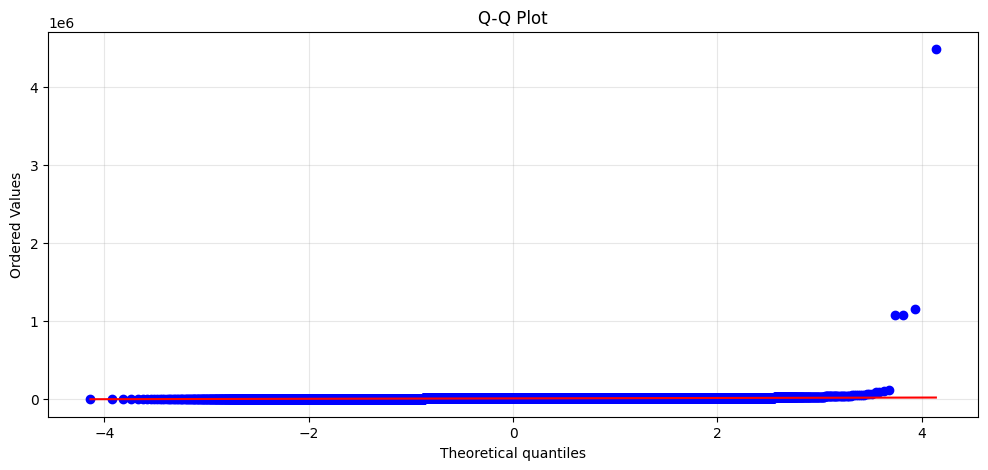

In [288]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(1, figsize=(12, 5))
# Q-Q plot
stats.probplot(y_train, dist="norm", plot=axes)
axes.set_title('Q-Q Plot')
axes.grid(True, alpha=0.3)

Загиб справа - имеем тяжелый хвост

In [289]:
y_train_transformed = np.log1p(y_train)

In [290]:
for col in X_train.columns:
    X_train_transformed = X_train.copy()
    X_test_transformed = X_test.copy()
    const = 1 if X_train[col].min() == 0 else 0
    X_train_transformed[col] = np.log1p(X_train[col] + const)
    X_test_transformed[col] = np.log1p(X_test[col] + const)

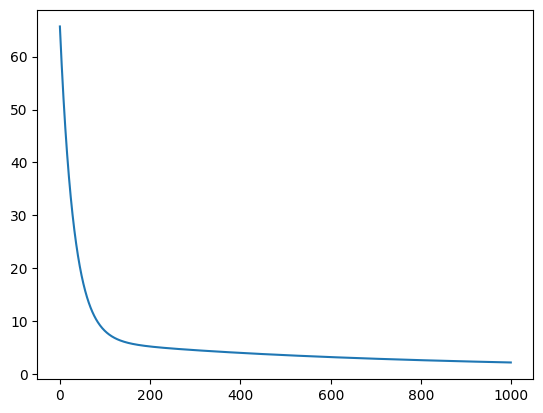

In [291]:
model = BasicLinearRegression()
model.fit(X_train_transformed, y_train_transformed, plot=True)

In [292]:
y_test_pred_transformed = model.predict(X_test_transformed)

In [293]:
y_test_pred_original = np.expm1(y_test_pred_transformed)
y_test_pred_original

array([ 2399.58344434,   213.12611043, 31966.4369475 , ...,
        4245.79148559,   837.73009925,  3529.44540017], shape=(9871,))

In [294]:
mean_absolute_error(y_test, y_test_pred_original)

471980.84189561446

In [295]:
root_mean_squared_error(y_test, y_test_pred_original)

45070524.01873808

In [296]:
r2_score(y_test, y_test_pred_original)

-278892252.08454674

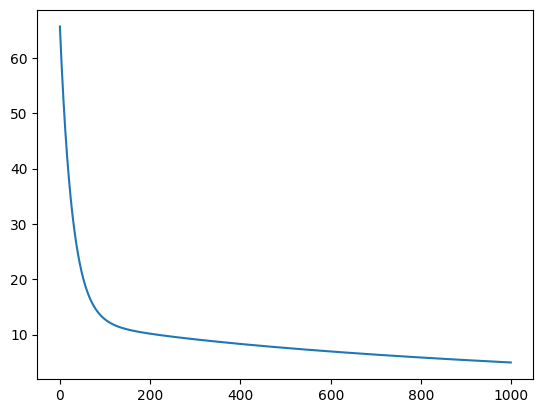

In [355]:
model = RidgeLinearRegression()
model.fit(X_train_transformed, y_train_transformed, plot=True)

In [356]:
y_test_pred_transformed = model.predict(X_test_transformed)

In [357]:
y_test_pred_original = np.expm1(y_test_pred_transformed)
y_test_pred_original

array([ 1587.10394838,   162.28858383, 11192.40310432, ...,
        2041.27768884,   870.09550607,  3218.46172912], shape=(9871,))

In [358]:
mean_absolute_error(y_test, y_test_pred_original)

5753.411944825486

In [359]:
root_mean_squared_error(y_test, y_test_pred_original)

134021.14124853915

In [360]:
r2_score(y_test, y_test_pred_original)

-2465.0271830206193

+ Следующий прием — это выбросы. Угол линии линейной регрессии сильно зависит от выбросов. И часто следует удалять эти точки только из обучающих данных. Необходимо объяснить, почему они были удалены только из обучающей выборки. Мы рекомендуем выполнить это упражнение и сравнить результаты.

Почему выбросы удаляются только из обучающей выборки?

Чтобы обучить модель на «чистых» и репрезентативных данных, но при этом сохранить её способность работать в реальном мире, где выбросы существуют. Удаление их из валидационной/тестовой выборки исказило бы оценку этой способности.

<Axes: >

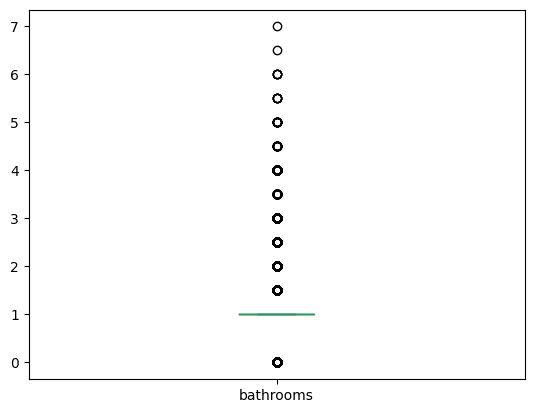

In [297]:
X_train['bathrooms'].plot.box()

<Axes: >

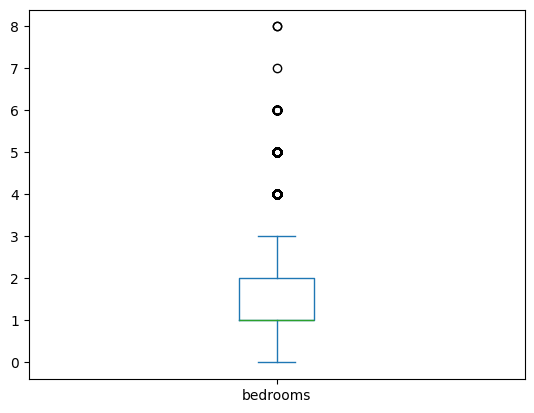

In [298]:
X_train['bedrooms'].plot.box()

<Axes: >

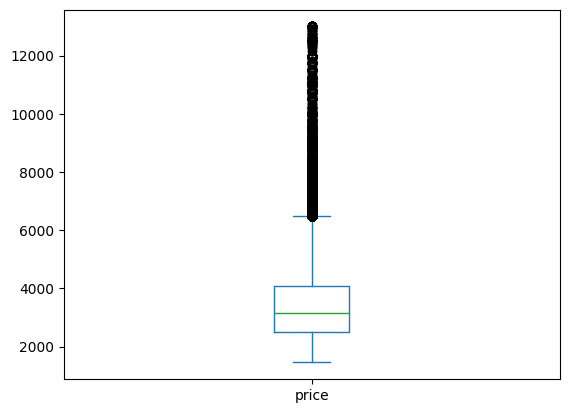

In [299]:
X_train_all = pd.concat([X_train, y_train], axis=1)
lower = X_train_all['price'].quantile(0.01)
upper = X_train_all['price'].quantile(0.99) 
X_train_tmp = X_train_all[(X_train_all['price'] >= lower) & (X_train_all['price'] <= upper)]
X_train_tmp['price'].plot.box()

In [300]:
X_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38696 entries, 4 to 99266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          38696 non-null  float64
 1   bedrooms           38696 non-null  int64  
 2   Elevator           38696 non-null  int64  
 3   CatsAllowed        38696 non-null  int64  
 4   HardwoodFloors     38696 non-null  int64  
 5   DogsAllowed        38696 non-null  int64  
 6   Doorman            38696 non-null  int64  
 7   Dishwasher         38696 non-null  int64  
 8   NoFee              38696 non-null  int64  
 9   LaundryinBuilding  38696 non-null  int64  
 10  FitnessCenter      38696 non-null  int64  
 11  Pre-War            38696 non-null  int64  
 12  LaundryinUnit      38696 non-null  int64  
 13  RoofDeck           38696 non-null  int64  
 14  OutdoorSpace       38696 non-null  int64  
 15  DiningRoom         38696 non-null  int64  
 16  HighSpeedInternet  38696 no

<Axes: >

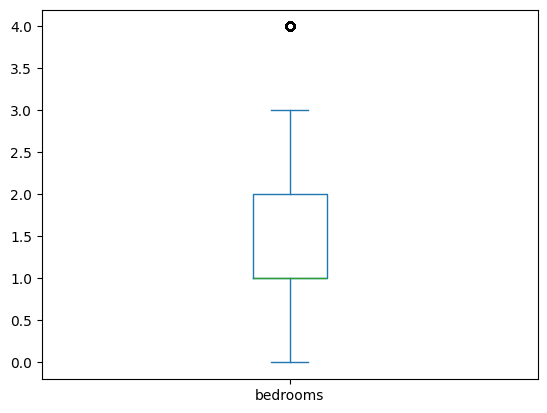

In [301]:
lower = X_train_all['bedrooms'].quantile(0.01)
upper = X_train_all['bedrooms'].quantile(0.99) 
X_train_tmp = X_train_tmp[(X_train_tmp['bedrooms'] >= lower) & (X_train_tmp['bedrooms'] <= upper)]
X_train_tmp['bedrooms'].plot.box()

In [302]:
X_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38492 entries, 4 to 99266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          38492 non-null  float64
 1   bedrooms           38492 non-null  int64  
 2   Elevator           38492 non-null  int64  
 3   CatsAllowed        38492 non-null  int64  
 4   HardwoodFloors     38492 non-null  int64  
 5   DogsAllowed        38492 non-null  int64  
 6   Doorman            38492 non-null  int64  
 7   Dishwasher         38492 non-null  int64  
 8   NoFee              38492 non-null  int64  
 9   LaundryinBuilding  38492 non-null  int64  
 10  FitnessCenter      38492 non-null  int64  
 11  Pre-War            38492 non-null  int64  
 12  LaundryinUnit      38492 non-null  int64  
 13  RoofDeck           38492 non-null  int64  
 14  OutdoorSpace       38492 non-null  int64  
 15  DiningRoom         38492 non-null  int64  
 16  HighSpeedInternet  38492 no

<Axes: >

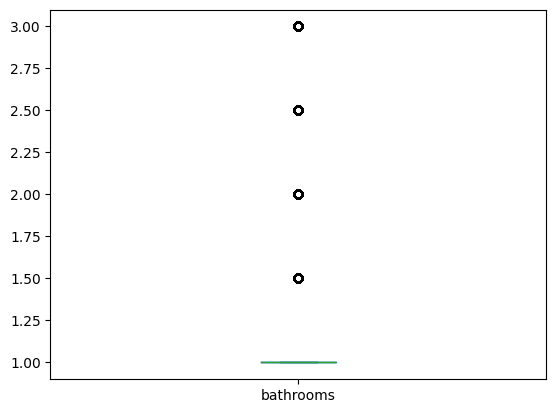

In [303]:
lower = X_train_all['bathrooms'].quantile(0.01)
upper = X_train_all['bathrooms'].quantile(0.99) 
X_train_tmp = X_train_tmp[(X_train_tmp['bathrooms'] >= lower) & (X_train_tmp['bathrooms'] <= upper)]
X_train_tmp['bathrooms'].plot.box()

In [304]:
X_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38178 entries, 4 to 99266
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathrooms          38178 non-null  float64
 1   bedrooms           38178 non-null  int64  
 2   Elevator           38178 non-null  int64  
 3   CatsAllowed        38178 non-null  int64  
 4   HardwoodFloors     38178 non-null  int64  
 5   DogsAllowed        38178 non-null  int64  
 6   Doorman            38178 non-null  int64  
 7   Dishwasher         38178 non-null  int64  
 8   NoFee              38178 non-null  int64  
 9   LaundryinBuilding  38178 non-null  int64  
 10  FitnessCenter      38178 non-null  int64  
 11  Pre-War            38178 non-null  int64  
 12  LaundryinUnit      38178 non-null  int64  
 13  RoofDeck           38178 non-null  int64  
 14  OutdoorSpace       38178 non-null  int64  
 15  DiningRoom         38178 non-null  int64  
 16  HighSpeedInternet  38178 no

In [305]:
y_train_outliers = X_train_tmp['price']

In [306]:
X_train_outliers = X_train_tmp.drop(columns='price')

In [307]:
results_mae_extra2 = pd.DataFrame(columns=['model', 'train', 'test'])
results_rmse_extra2 = pd.DataFrame(columns=['model', 'train', 'test'])
results_r2_extra2 = pd.DataFrame(columns=['model', 'train', 'test'])

array([3560.95569798, 1844.82513672, 5361.55306017, ..., 3493.54587685,
       3303.72116022, 4260.26332381], shape=(9871,))

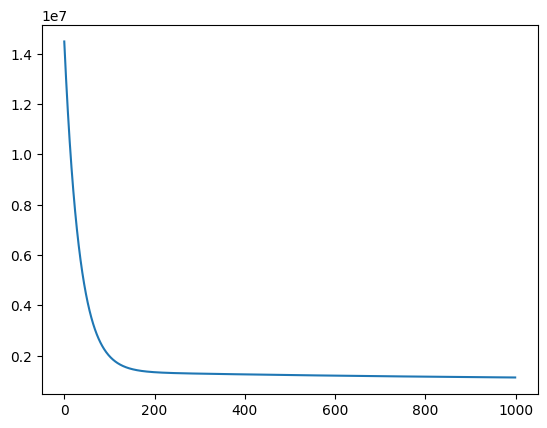

In [308]:
regr = BasicLinearRegression()
regr.fit(X_train_outliers, y_train_outliers, plot=True)
pred = regr.predict(X_test)
pred

In [309]:
pred_train = regr.predict(X_train_outliers)

In [310]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["LR common", mae_train, mae_test]
print(mae_test, mae_train)

890.5346290686728 761.7351768007483


In [311]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["LR common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2316.9355986648015 1086.5762172747359


In [312]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["LR common", r2_train, r2_test]
print(r2_test, r2_train)

0.2629801910939178 0.5019533727015819


array([3389.54660118, 1895.00870312, 4633.36455058, ..., 3324.64851259,
       3195.54412544, 4029.30868163], shape=(9871,))

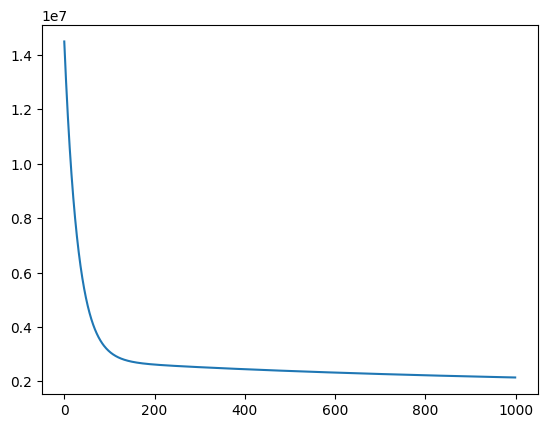

In [313]:
ridge = RidgeLinearRegression()
ridge.fit(X_train_outliers, y_train_outliers, plot=True)
pred = ridge.predict(X_test)
pred

In [314]:
pred_train = ridge.predict(X_train_outliers)

In [315]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["ridge_common", mae_train, mae_test]
print(mae_test, mae_train)

902.1242823895524 766.172842286521


In [316]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["ridge_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2407.3989779001304 1168.863046328897


In [317]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["ridge_common", r2_train, r2_test]
print(r2_test, r2_train)

0.2043036250862812 0.4236625103254187


array([3560.75594959, 1845.59349545, 5359.05593302, ..., 3490.83311086,
       3302.58932196, 4260.01147257], shape=(9871,))

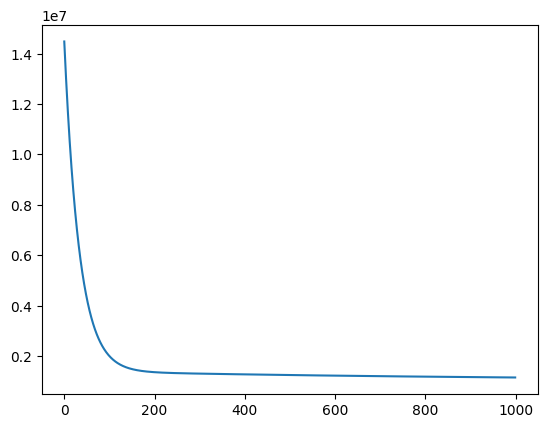

In [318]:
lasso = LassoLinearRegression()
lasso.fit(X_train_outliers, y_train_outliers, plot=True)
pred = lasso.predict(X_test)
pred

In [319]:
pred_train = lasso.predict(X_train_outliers)

In [320]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["lasso_common", mae_train, mae_test]
print(mae_test, mae_train)

890.3161677626686 761.5097910539524


In [321]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["lasso_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2316.9297801493344 1086.4483179548981


In [322]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["lasso_common", r2_train, r2_test]
print(r2_test, r2_train)

0.26298389284184354 0.5020706145017595


array([3516.28910922, 1837.8298843 , 5138.58569696, ..., 3448.03511742,
       3276.46468814, 4213.1877247 ], shape=(9871,))

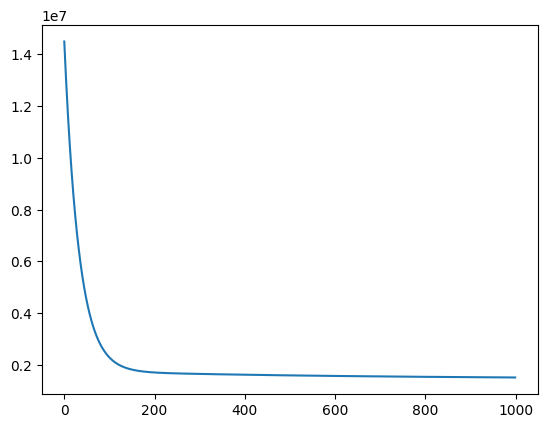

In [323]:
en = ElasticNetRegression()
en.fit(X_train_outliers, y_train_outliers, plot=True)
pred = en.predict(X_test)
pred

In [324]:
pred_train = en.predict(X_train_outliers)

In [325]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["elastic_common", mae_train, mae_test]
print(mae_test, mae_train)

888.9574904958979 758.2499074256708


In [326]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["elastic_common", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2340.539781265457 1103.3347965199587


In [327]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["elastic_common", r2_train, r2_test]
print(r2_test, r2_train)

0.24788666293367112 0.4864718640972152


In [328]:
results_mae_extra2

,model,train,test
0,LR common,761.735177,890.534629
1,ridge_common,766.172842,902.124282
2,lasso_common,761.509791,890.316168
3,elastic_common,758.249907,888.957490


In [329]:
results_rmse_extra2

,model,train,test
0,LR common,1086.576217,2316.935599
1,ridge_common,1168.863046,2407.398978
2,lasso_common,1086.448318,2316.929780
3,elastic_common,1103.334797,2340.539781


In [330]:
results_r2_extra2

,model,train,test
0,LR common,0.501953,0.262980
1,ridge_common,0.423663,0.204304
2,lasso_common,0.502071,0.262984
3,elastic_common,0.486472,0.247887


+ Scaler

In [331]:
sc = StandardScalerEx()
sc.fit(X_train)
scaled_data_std = sc.transform(X_train_outliers)
scaled_test_std = sc.transform(X_test)

array([2656.08099557, 1905.09785534, 4622.82440475, ..., 2848.95116815,
       2935.92928512, 3237.32937995], shape=(9871,))

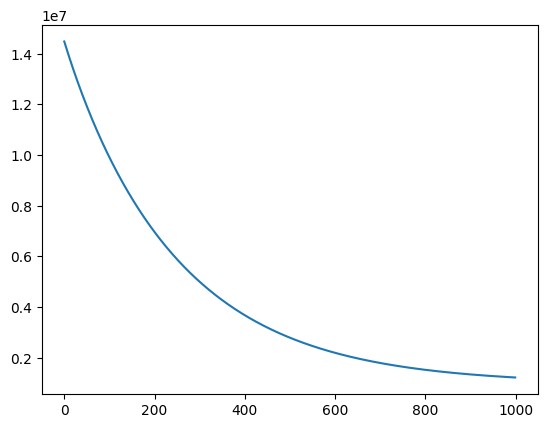

In [332]:
regr = BasicLinearRegression()
regr.fit(scaled_data_std, y_train_outliers, plot=True)
pred = regr.predict(scaled_test_std)
pred

In [333]:
pred_train = regr.predict(scaled_data_std)

In [334]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["LR common std", mae_train, mae_test]
print(mae_test, mae_train)

888.454205996309 757.2520099444858


In [335]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["LR common std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2347.2135667556327 1124.9635220593996


In [336]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["LR common std", r2_train, r2_test]
print(r2_test, r2_train)

0.24359141505595994 0.466141091837156


array([2804.9534829 , 2246.95725154, 4241.47440354, ..., 3093.26517422,
       3010.40611393, 3293.24035176], shape=(9871,))

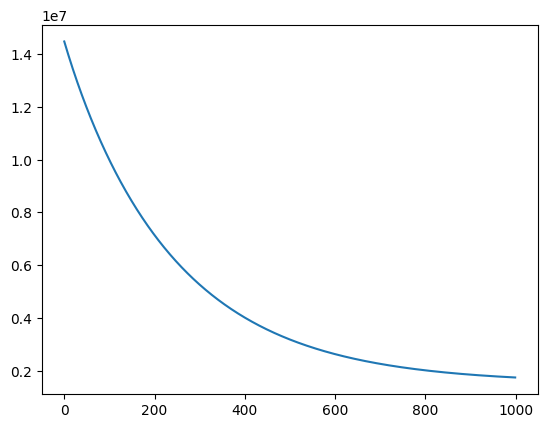

In [337]:
ridge = RidgeLinearRegression()
ridge.fit(scaled_data_std, y_train_outliers, plot=True)
pred = ridge.predict(scaled_test_std)
pred

In [338]:
pred_train = ridge.predict(scaled_data_std)

In [339]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["ridge_common std", mae_train, mae_test]
print(mae_test, mae_train)

920.3857424084779 783.0386026828779


In [340]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["ridge_common std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2451.6121276570325 1232.0876218009382


In [341]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["ridge_common std", r2_train, r2_test]
print(r2_test, r2_train)

0.17480847687557866 0.35962731006883253


array([2657.66217746, 1905.12428788, 4623.90802946, ..., 2848.73744461,
       2937.27548557, 3237.3345789 ], shape=(9871,))

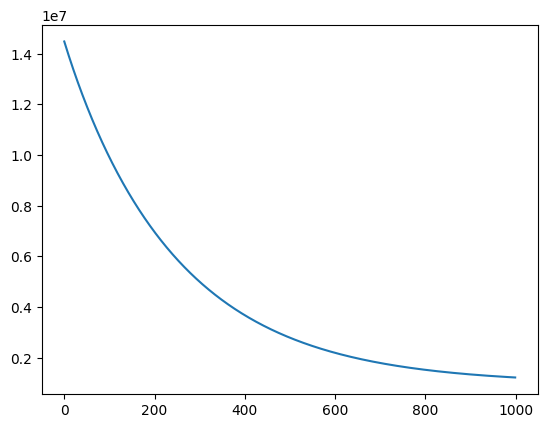

In [342]:
lasso = LassoLinearRegression()
lasso.fit(scaled_data_std, y_train_outliers, plot=True)
pred = lasso.predict(scaled_test_std)
pred

In [343]:
pred_train = lasso.predict(scaled_data_std)

In [344]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["lasso_common std", mae_train, mae_test]
print(mae_test, mae_train)

888.3127668437597 757.0978293568952


In [345]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["lasso_common std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2347.3799291131054 1125.074445928436


In [346]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["lasso_common std", r2_train, r2_test]
print(r2_test, r2_train)

0.24348418802160432 0.46603580732979377


array([2706.88194988, 2017.12750612, 4501.66221655, ..., 2942.27722959,
       2963.90786899, 3265.0114344 ], shape=(9871,))

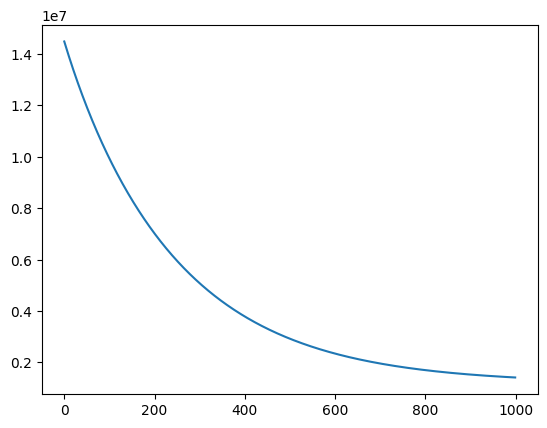

In [347]:
en = ElasticNetRegression()
en.fit(scaled_data_std, y_train_outliers, plot=True)
pred = en.predict(scaled_test_std)
pred

In [348]:
pred_train = en.predict(scaled_data_std)

In [349]:
mae_train = get_MAE(y_train_outliers, pred_train)
mae_test = get_MAE(y_test, pred)
results_mae_extra2.loc[len(results_mae_extra2)] = ["elastic_common std", mae_train, mae_test]
print(mae_test, mae_train)

885.1557218547969 751.9002916609004


In [350]:
rmse_train = get_RMSE(y_train_outliers, pred_train)
rmse_test = get_RMSE(y_test, pred)
results_rmse_extra2.loc[len(results_rmse_extra2)] = ["elastic_common std", rmse_train, rmse_test]
print(rmse_test, rmse_train)

2375.59204417886 1149.609321223278


In [351]:
r2_train = get_R2(y_train_outliers, pred_train)
r2_test = get_R2(y_test, pred)
results_r2_extra2.loc[len(results_r2_extra2)] = ["elastic_common std", r2_train, r2_test]
print(r2_test, r2_train)

0.22519045861950604 0.44249320338409115


In [352]:
results_mae_extra2

,model,train,test
0,LR common,761.735177,890.534629
1,ridge_common,766.172842,902.124282
2,lasso_common,761.509791,890.316168
3,elastic_common,758.249907,888.957490
4,LR common std,757.252010,888.454206
5,ridge_common std,783.038603,920.385742
6,lasso_common std,757.097829,888.312767
7,elastic_common std,751.900292,885.155722


In [353]:
results_rmse_extra2

,model,train,test
0,LR common,1086.576217,2316.935599
1,ridge_common,1168.863046,2407.398978
2,lasso_common,1086.448318,2316.929780
3,elastic_common,1103.334797,2340.539781
4,LR common std,1124.963522,2347.213567
5,ridge_common std,1232.087622,2451.612128
6,lasso_common std,1125.074446,2347.379929
7,elastic_common std,1149.609321,2375.592044


In [354]:
results_r2_extra2

,model,train,test
0,LR common,0.501953,0.262980
1,ridge_common,0.423663,0.204304
2,lasso_common,0.502071,0.262984
3,elastic_common,0.486472,0.247887
4,LR common std,0.466141,0.243591
5,ridge_common std,0.359627,0.174808
6,lasso_common std,0.466036,0.243484
7,elastic_common std,0.442493,0.225190


+ Также полезным будет реализовать алгоритм линейной регрессии с пакетным и мини-пакетным обучением или аналитическим решением (как упоминалось в разделе 4.1).